## 英文詞頻矩陣

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
#?CountVectorizer
vectorizer = CountVectorizer(min_df=1)
content = ["How to format my hard disk", " Hard disk format problems "]
X = vectorizer.fit_transform(content)

In [4]:
print(vectorizer.get_feature_names())

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']


In [5]:
print(X.toarray())

[[1 1 1 1 1 0 1]
 [1 1 1 0 0 1 0]]


In [8]:
import os
path = 'data/toy/'
posts = []
for fname in os.listdir(path):
    posts.append(open(path + fname).read())

In [9]:
posts

['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
 'Imaging databases provide storage capabilities.',
 'Most imaging databases safe images permanently.',
 'Imaging databases store data.',
 'Imaging databases store data. Imaging databases store data. Imaging databases store data.']

In [16]:
posts = ['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
 'Imaging databases provide storage capabilities.',
 'Most imaging databases safe images permanently.',
 'Imaging databases store data.',
 'Imaging databases store data. Imaging databases store data. Imaging databases store data.']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1)

In [11]:
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape


In [12]:
X_train.shape

(5, 25)

In [15]:
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'this', 'toy']


In [13]:
X_train.toarray()

array([[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0],
       [0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0]], dtype=int64)

In [20]:
new_post = 'qoo imaging database'
new_post_vec = vectorizer.transform([new_post])


In [21]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [40]:
type(new_post_vec.toarray())

numpy.ndarray

In [22]:
import scipy as sp

# euclidean
# sqrt(sum((v1 - v2) ** 2))

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())


In [30]:
import numpy as np
import math
a  = np.array([0,0,1,1,0])
b  = np.array([1,0,1,1,1])
np.sqrt(sum((a - b) ** 2))

1.4142135623730951

In [32]:
sp.linalg.norm( (a - b))

1.4142135623730951

In [45]:
for i in range(0, num_samples):
    post_vec = X_train.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    print(posts[i],d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 3.872983346207417
Imaging databases provide storage capabilities. 2.0
Most imaging databases safe images permanently. 2.23606797749979
Imaging databases store data. 1.7320508075688772
Imaging databases store data. Imaging databases store data. Imaging databases store data. 5.5677643628300215


In [55]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1.toarray()) 
    v2_normalized  = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [46]:
# 小內閣之一是她？ 「王淺秋」內定高市新聞局長
# 韓國瑜要在一個月內完成小內閣組閣，局處首長人選，他說目前找到了一半，至於名單有誰，韓國瑜說直接講名字很敏感，會在就職日公布，不過前一天，韓國瑜北上參加私人餐會，媒體在現場等待時間，六福集團的公關協理王淺秋儼然像公關，在場當協調橋樑，加上王淺秋過去就有新聞媒體背景，外傳將接任高雄市新聞局長。

In [47]:
# 小內閣 王淺秋 高市 新聞局長
# 小內閣 王淺秋 高市 新聞局長 韓國瑜 首長 人選 一半 名單 敏感...

In [51]:
a = np.array([1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
b = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
delta = a - b
sp.linalg.norm(delta)

4.0

In [53]:
a = np.array([1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
b = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
a_normalized  = a / sp.linalg.norm(a) 
b_normalized  = b / sp.linalg.norm(b)
delta = a_normalized - b_normalized
sp.linalg.norm(delta)

1.0514622242382672

In [56]:
for i in range(0, num_samples):
    post_vec = X_train.getrow(i)
    d = dist(post_vec, new_post_vec)
    print(posts[i],d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
Imaging databases provide storage capabilities. 1.0514622242382672
Most imaging databases safe images permanently. 1.0878894332937856
Imaging databases store data. 1.0
Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


In [62]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())


['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'safe', 'storage', 'store', 'stuff', 'toy']


In [59]:
len(vectorizer.get_feature_names())

18

In [60]:
list(vectorizer.get_stop_words())[0:10]

['noone',
 'our',
 'next',
 'her',
 'other',
 'formerly',
 'around',
 'fifteen',
 'rather',
 'nevertheless']

In [63]:
new_post = 'qoo imaging database'
new_post_vec = vectorizer.transform([new_post])


In [64]:
for i in range(0, num_samples):
    post_vec = X_train.getrow(i)
    d = dist(post_vec, new_post_vec)
    print(posts[i],d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
Imaging databases provide storage capabilities. 1.0514622242382672
Most imaging databases safe images permanently. 1.0514622242382672
Imaging databases store data. 1.0
Imaging databases store data. Imaging databases store data. Imaging databases store data. 1.0


In [65]:
! pip install nltk

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [66]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')

In [67]:
s.stem('graphics')

'graphic'

In [68]:
s.stem("imaging")

'imag'

In [69]:
s.stem("image")

'imag'

In [70]:
s.stem("imagination")

'imagin'

In [71]:
s.stem("imagine")

'imagin'

In [72]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [73]:
vectorizer = StemmedCountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())


['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'safe', 'storag', 'store', 'stuff', 'toy']


In [76]:
new_post = 'qoo imaging database'
new_post_vec = vectorizer.transform([new_post])
new_post_vec.toarray()

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [77]:
for i in range(0, num_samples):
    post_vec = X_train.getrow(i)
    d = dist(post_vec, new_post_vec)
    print(posts[i],d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases provide storage capabilities. 0.8573732768944039
Most imaging databases safe images permanently. 0.6296288974669553
Imaging databases store data. 0.7653668647301795
Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.7653668647301795


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


In [79]:
vectorizer = StemmedTfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(posts)
print(vectorizer.get_feature_names())

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'safe', 'storag', 'store', 'stuff', 'toy']


In [81]:
new_post = 'qoo imaging database'
new_post_vec = vectorizer.transform([new_post])
#new_post_vec.toarray()

In [82]:
for i in range(0, num_samples):
    post_vec = X_train.getrow(i)
    d = dist(post_vec, new_post_vec)
    print(posts[i],d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
Imaging databases provide storage capabilities. 1.0789758507558254
Most imaging databases safe images permanently. 0.859044512133176
Imaging databases store data. 0.924634506718001
Imaging databases store data. Imaging databases store data. Imaging databases store data. 0.924634506718001


## 中文詞頻矩陣

In [86]:
import jieba
jieba.load_userdict('userdict.txt')

a = ['柯文哲為了大巨蛋一事找趙藤雄算帳', 
     '柯P將不在大巨蛋舉辦世運會']

corpus = []
for s in a:
    corpus.append(' '.join(jieba.cut(s)))
corpus


['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳', '柯P 將不在 大巨蛋 舉辦 世運會']

In [87]:
corpus = [' '.join(jieba.cut(s)) for s in a]
corpus

['柯文哲 為 了 大巨蛋 一事 找 趙藤雄 算帳', '柯P 將不在 大巨蛋 舉辦 世運會']

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [91]:
vectorizer.get_feature_names()

['一事', '世運會', '大巨蛋', '將不在', '柯p', '柯文哲', '算帳', '舉辦', '趙藤雄']

In [93]:
X.toarray()

array([[1, 0, 1, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [94]:
import requests
term = '柯文哲'
res = requests.get('https://zh.wikipedia.org/wiki/{}'.format(term))

In [100]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')
synonyms = []
for p in soup.select('p'):
    if p.select_one('span'):
        synonyms.extend([w.text for w in p.select('b')])
synonyms

['柯文哲', 'Ko Wen-je', '柯P', 'KP']

In [103]:
with open('synonym.txt', 'w') as f:
    f.write('/'.join(synonyms))

In [112]:
synoym_dic = {}
for s in open('synonym.txt', 'r'):
    words = s.split('/')
    for w in words[1:]:
        synoym_dic[w.lower()] = words[0]
synoym_dic

{'ko wen-je': '柯文哲', 'kp': '柯文哲', '柯p': '柯文哲'}

In [113]:
class SynonymCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(SynonymCountVectorizer, self).build_analyzer()
        return lambda doc: (synoym_dic.get(w, w) for w in analyzer(doc))

In [114]:
vectorizer = SynonymCountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['一事', '世運會', '大巨蛋', '將不在', '柯文哲', '算帳', '舉辦', '趙藤雄']


In [115]:
X.toarray()

array([[1, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 1, 0]], dtype=int64)

In [116]:
vectorizer = SynonymCountVectorizer(stop_words=['一事'])
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['世運會', '大巨蛋', '將不在', '柯文哲', '算帳', '舉辦', '趙藤雄']


### 中文停用字詞
- https://github.com/tomlinNTUB/Python-in-5-days/blob/master/10-2%20%E4%B8%AD%E6%96%87%E6%96%B7%E8%A9%9E-%E7%A7%BB%E9%99%A4%E5%81%9C%E7%94%A8%E8%A9%9E.md

In [123]:
import pandas
s = pandas.read_clipboard(header = None)
stopwords = s[0].tolist()

In [125]:
#stopwords

## 計算文章相似度

In [117]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/ctbc/master/data/appledaily_hw.xlsx')

In [121]:

corpus = []
titles = []
for rec in news.iterrows():
    titles.append(rec[1].title)
    corpus.append(' '.join(jieba.cut(rec[1].content)))

In [146]:
import re
class ChineseCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(ChineseCountVectorizer, self).build_analyzer()
        return lambda doc: (w for w in analyzer(doc) if re.match('[\u4e00-\u9fa5]+', w))

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = ChineseCountVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(corpus)

In [151]:
X

<899x36095 sparse matrix of type '<class 'numpy.int64'>'
	with 113215 stored elements in Compressed Sparse Row format>

In [128]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [130]:
cs.shape

(899, 899)

In [132]:
titles[0]

'【更新】水利會改官派明闖關\u3000綠委24小時前顧議場大門防藍突襲'

In [137]:
for idx in cs[0].argsort()[1:11]:
    if cs[0][idx] < 0.8:
        print(titles[idx], cs[0][idx])

反對水利會改制　吳敦義下令：藍委做好夜宿立院抗爭準備 0.6249319023845766
農田水利會改公務機關　蔡英文：這不是綁樁 0.6650818913541277
【搏感情動畫】台電每年30億敦親睦鄰費　協助立委選民服務 0.7763414418773449
在野黨突襲表決《勞基法》修正案無效　民進黨烙人成功擋下 0.7785595271207466
罷免案將投票　李遠哲今再度現身力挺黃國昌 0.7821725817618267
國防部解約慶富要提告　馮世寬怒嗆三遍：請便 0.787735535313332


In [138]:
def getSimiliarArticle(pos):
    print('查詢文章:', titles[pos])
    for idx in cs[pos].argsort()[1:11]:
        if cs[pos][idx] < 0.8:
            print('相關文章:',titles[idx], cs[pos][idx])

In [140]:
getSimiliarArticle(12)

查詢文章: 黃國昌：長期目標要消滅國民黨　不支持柯文哲的兩岸一家親
相關文章: 「兩蔣時代」超譯　網友：不准傷皇城內的和氣！ 0.573991318811758
相關文章: 罷免案將投票　李遠哲今再度現身力挺黃國昌 0.5856440615013038
相關文章: 罷昌案周六投票　時代力量全力澄清不實謠言 0.629022271791837
相關文章: 黃國昌若被罷免會更強　他：成為選輸北市的阿扁 0.6310238769836006
相關文章: 【聲援片】沈發惠呼籲罷昌案投「不同意」　黃國昌：謝謝您 0.7457647744915028


In [162]:
csw = cosine_distances(X.T)

In [163]:
csw.shape

(36095, 36095)

In [170]:
#titles[]

In [168]:
vectorizer.get_feature_names().index('小嫻')

12028

In [169]:
for idx in csw[12028].argsort()[1:11]:
    print(vectorizer.get_feature_names()[idx], csw[12028][idx])

何守 0.057847605573501104
密友 0.24791062532467667
何守正 0.2503553599400147
健身房 0.2884303103522792
信妙 0.3126823393798195
分居 0.34939790478943866
宮導致 0.3514046374402636
何家 0.3578979193561096
獨子 0.36503471393081455
不孕 0.36655934526106637


In [160]:
csw[19153].sort()

## 文字分群

In [171]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/ctbc/master/data/20150628news.xlsx')

In [175]:
corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['description'])))
    titles.append(rec[1]['title'])

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [177]:
X

<147x12827 sparse matrix of type '<class 'numpy.int64'>'
	with 23782 stored elements in Compressed Sparse Row format>

In [178]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)

In [179]:
cs.shape

(147, 147)

In [180]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=4, init='k-means++', random_state=42)
c = km.fit_predict(cs)


In [186]:
np_titles = np.array(titles)
for rec in np_titles[c==3]:
    print(rec)

希臘國內三分一自動櫃員機現金短缺
歐元區財長拒希臘延長救助計劃
呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
希臘違約在即  歐盟全力穩定經濟
希臘脫歐變可能 歐洲衝擊大
希債協議  法國願盡最後斡旋努力
希臘1／3提款機錢被提光
確保銀行穩定 希臘續與ECB緊密合作
希臘態度強硬 歐元區耐心漸失
希臘盼展延債務 歐元區拒絕


## 任務：
- 請將資料集 20171214news.xlsx (https://raw.githubusercontent.com/ywchiu/ctbc/master/data/20171214news.xlsx) 分成20群並檢視每一群的分群結果

In [187]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/ctbc/master/data/20171214news.xlsx')

In [189]:
news.head()

,category,content,link,title
0,政治,新增：立委說法民進黨立法院黨團預計在明天的院會中，讓改制農田水利會的《農田水利會組織通則》修...,https://tw.news.appledaily.com/politics/realti...,【更新】水利會改官派明闖關 綠委24小時前顧議場大門防藍突襲
1,論壇,邱俊棠／台中市民、見習醫師；曾任台灣醫學生聯合會對外副會長對於公民參與公眾事務而能得到單位首...,https://tw.news.appledaily.com/forum/realtime/...,請中市府為所當為 加速中火燃煤限制
2,社會,被控來台涉發展情報組織的中國學生周泓旭，因接觸我方外交部官員而露餡落網，今年9月被台北地院一...,https://tw.news.appledaily.com/local/realtime/...,陸生共諜嗆台司法 「不敢公開審理我」
3,生活,【廣編特輯】 對於全能神教會在中國所遭受的迫害與在韓國、香港及臺灣所面對的反面宣傳，非政府組...,https://tw.news.appledaily.com/life/realtime/2...,【特企】NGO聯名譴責中共迫害宗教信仰
4,生活,立法院交通委員會今審查《道路交通管理處罰條例》，通過營業大客車駕駛人行駛一般道路未繫安全帶，...,https://tw.news.appledaily.com/life/realtime/2...,乘客搭大客車不配合繫安全帶 立院初審通過可罰6千元


In [190]:
corpus = []
titles = []
for rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    titles.append(rec[1]['title'])

In [191]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [192]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)

In [211]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=20, init='k-means++', random_state=42)
c = km.fit_predict()


TypeError: fit_predict() missing 1 required positional argument: 'X'

In [213]:
np_titles = np.array(titles)
for rec in np_titles[c==0]:
    print(rec)

小嫻婚變冒毒菇　勾于美人「奉茶」夢魘
明明是好康分享文　網友卻瘋喊噁心慎入
「想抱孫要看天！」　他批小嫻婆婆殘忍強逼
【好聚不好散】離婚掏出6千萬　這女星比小嫻還慘
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
十二月十四日各報頭條搶先報
不捨善良小嫻慘遭婚變　乃哥「命運捉弄人」
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
【毒菇護弟】何守正姊姊不是華岡七仙女　美法連線批小嫻
小嫻離婚導火線　拉何守正信妙禪
【狗仔偷拍】何守正現身！「全台最沒尊嚴的婆婆」也出來了
小嫻中分手魔咒！ 同公司4女星全都婚變
他因為小嫻婚變被分手　網友跪求：拜託別放生
潔哥目睹「正嫻之變」　驚呼：靠北系列竟是真的
何守正姐姐神護航！遭網友酸：全台最討人厭大姑
小嫻別傻傻被欺負！女律師說「姐寶」就要這樣對付
【小嫻婚變】他說很奇怪　「一定是男生劈腿？」
教友小嫻婚姻觸礁　曾之喬談情避不開Seafood
小嫻守正結婚在台沒登記　想離婚只有兩條路
胡瓜2個月前耳聞小嫻婚變　震驚之餘好心疼
昔日搭檔談小嫻婚變　曾國城這樣說
何守正兩個姊姊護航扯婆媳　「他」戳破媽寶特色
大姑出面護弟！轟小嫻不能生「媽媽是全台最沒有尊嚴的婆婆」
小嫻信奉妙禪　關鍵原因與何守正有關！
小嫻何守正想離婚　必須先做這件事！
【K律師論點】離婚＝失敗？　K律師這麼說
真尷尬！他只是聊個天　正妹就退出對話了
女網紅因為這理由挺余祥銓！讓人不知該哭還是笑
「小嫻不快樂！」　許聖梅：何守正虧欠她
一下車有人墜樓掉在車頂　網友：車牌有密碼
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻多信妙禪？　曾見證「師父帶我跳舞」
【話當年】被拍和她上賓館　何守正掰了阿妹
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【小嫻離婚】何守正稱沒有遺憾　人妻女星超火「一嘴屁話」
【有片】何守正小嫻驚爆離婚　健身房中嗅出端倪
【小嫻離婚】3大退讓人財兩失　求子花光430萬積蓄


In [202]:
from sklearn.metrics import silhouette_score

sil_ary = []
for k in range(2,21):
    km = cluster.KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(cs)
    sil_ary.append({'group':k,
                    'silhouette':silhouette_score(cs, labels=c)})


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'rec', 'dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


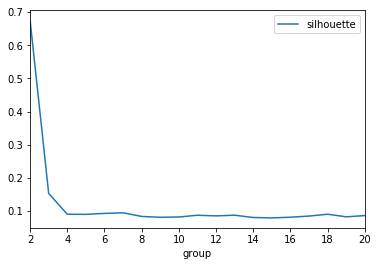

In [203]:
% pylab inline
import pandas
sil_df = pandas.DataFrame(sil_ary)
sil_df.plot(kind = 'line', x='group', y='silhouette')


In [214]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(X)

In [215]:
cs.shape

(899, 899)

In [219]:
import networkx as nx
m = (cs >= 0.5).astype(int)

In [220]:
G = nx.from_numpy_matrix(m)


In [221]:
! pip install python-louvain


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [222]:
import community
comm = community.best_partition(G)
cluster_ary = np.array(list(comm.values()) )


In [223]:
titles_ary  = np.array(titles)


In [225]:
from collections import Counter
c = Counter(cluster_ary)
for group, cnt in c.most_common(10):
    print(group)
    articles = titles_ary[cluster_ary == group]
    for news in articles:
        print(news)

3
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
70
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
小心！在美結婚台灣沒登記　偷腥照樣能捉姦
小嫻離婚導火線　拉何守正信妙禪
小嫻守正結婚在台沒登記　想離婚只有兩條路
小嫻何守正想離婚　必須先做這件事！
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【小嫻離婚】何守正稱沒有遺憾　人妻女星超火「一嘴屁話」
【小嫻離婚】3大退讓人財兩失　求子花光430萬積蓄
114
驚！　野生捕獲恐龍遛汪星人
驚！　野生捕獲恐龍遛汪星人
搔癢無尾熊 表情超enjoy
【笑翻片】各種抓！動物止癢出奇招
【保護片】就是不能下水！狗狗護小主人
群狗亂舞開趴　畫面

In [229]:
c.most_common()

[(3, 30),
 (70, 13),
 (114, 7),
 (201, 4),
 (341, 4),
 (17, 3),
 (45, 3),
 (185, 3),
 (246, 3),
 (524, 3),
 (566, 3),
 (644, 3),
 (19, 2),
 (55, 2),
 (56, 2),
 (68, 2),
 (107, 2),
 (110, 2),
 (112, 2),
 (135, 2),
 (139, 2),
 (140, 2),
 (141, 2),
 (142, 2),
 (143, 2),
 (153, 2),
 (155, 2),
 (167, 2),
 (186, 2),
 (193, 2),
 (194, 2),
 (195, 2),
 (207, 2),
 (213, 2),
 (248, 2),
 (323, 2),
 (334, 2),
 (336, 2),
 (360, 2),
 (361, 2),
 (363, 2),
 (384, 2),
 (434, 2),
 (440, 2),
 (441, 2),
 (442, 2),
 (443, 2),
 (444, 2),
 (468, 2),
 (538, 2),
 (570, 2),
 (594, 2),
 (740, 2),
 (0, 1),
 (1, 1),
 (2, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (18, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (46, 1),
 (4

In [232]:
from collections import Counter
c = Counter(cluster_ary)
for group, cnt in c.most_common(10):
    print(group , cnt)
    #articles = titles[c == group]
    #for news in articles:
    #    print(news)


3 30
70 13
114 7
201 4
341 4
17 3
45 3
185 3
246 3
524 3


In [239]:
a = []
for e in c.most_common():
    a.append(e[0])
len(a)

791

In [241]:
titles_ary[cluster_ary == 70]

array(['【狗仔偷拍】小嫻搬離何守正家租66坪房\u3000月租6萬元', '許聖梅心疼小嫻被當空氣\u3000爆何守正「有兩個女學員」',
       '【動畫解盤】毒菇跳火線譙seafood\u3000小嫻難瘦香菇', '【獨家】小嫻賣房求子\u3000婆婆竟拒入籍何家',
       '小心！在美結婚台灣沒登記\u3000偷腥照樣能捉姦', '小嫻離婚導火線\u3000拉何守正信妙禪',
       '小嫻守正結婚在台沒登記\u3000想離婚只有兩條路', '小嫻何守正想離婚\u3000必須先做這件事！',
       '【內幕動畫】小嫻婚變何守正姊反擊\u3000不滿媽煮飯侍奉星媳婦', '小嫻婚變無徵兆\u3000男星嘆：兩人向來出雙入對',
       '【獨家內幕】太傷！小嫻被分手\u3000何守正當小三面前攤牌',
       '【小嫻離婚】何守正稱沒有遺憾\u3000人妻女星超火「一嘴屁話」',
       '【小嫻離婚】3大退讓人財兩失\u3000求子花光430萬積蓄'], dtype='<U36')

In [243]:
X

<899x38653 sparse matrix of type '<class 'numpy.int64'>'
	with 128155 stored elements in Compressed Sparse Row format>

In [247]:
m2 = X[cluster_ary == 70].sum(axis = 0)

In [250]:
arr = np.squeeze(np.asarray(m2))

In [254]:
features = np.array(vectorizer.get_feature_names())
features[arr.argsort()[::-1][0:10]]

array(['小嫻', '何守', '離婚', '結婚', '美國', '何家', '表示', '時間', '台灣', '婚姻'],
      dtype='<U18')

In [256]:
from collections import Counter
c = Counter(cluster_ary)

for group, cnt in c.most_common(10):
    print('第{}群'.format(group))
    articles = titles_ary[cluster_ary == group]
    m2 = X[cluster_ary == group].sum(axis = 0)
    arr = np.squeeze(np.asarray(m2))
    features = np.array(vectorizer.get_feature_names())
    keywords = features[arr.argsort()[::-1][0:10]]
    print('新聞關鍵字：{}'.format(','.join(keywords)))
    for news in articles:
        print(news)
    print('===========================')

第3群
新聞關鍵字：全能,神教,中國,宗教,宗教自由,組織,遭受,一個,迫害,研究
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
【特企】NGO聯名譴責中共迫害宗教信仰
第70群
新聞關鍵字：小嫻,何守,離婚,結婚,美國,何家,表示,時間,台灣,婚姻
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
許聖梅心疼小嫻被當空氣　爆何守正「有兩個女學員」
【動畫解盤】毒菇跳火線譙seafood　小嫻難瘦香菇
【獨家】小嫻賣房求子　婆婆竟拒入籍何家
小心！在美結婚台灣沒登記　偷腥照樣能捉姦
小嫻離婚導火線　拉何守正信妙禪
小嫻守正結婚在台沒登記　想離婚只有兩條路
小嫻何守正想離婚　必須先做這件事！
【內幕動畫】小嫻婚變何守正姊反擊　不滿媽煮飯侍奉星媳婦
小嫻婚變無徵兆　男星嘆：兩人向來出雙入對
【獨家內幕】太傷！小嫻被分手　何守正當小三面前攤牌
【小嫻離婚】何守正稱沒有遺憾　人妻女星超火「一嘴屁話」
【小嫻離婚】3大退讓人財兩失　求子花光430萬積蓄
第114群
新聞關鍵字：專頁

## 文章分類

In [259]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/ctbc/master/data/20171214news.xlsx')

In [262]:
corpus = []
titles = []
tags   = []
for rec in news[news['category'].isin(['娛樂','社會'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    titles.append(rec[1]['title'])
    tags.append(rec[1]['category'])

In [263]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [264]:
X

<247x13883 sparse matrix of type '<class 'numpy.int64'>'
	with 32161 stored elements in Compressed Sparse Row format>

In [269]:
from sklearn.cross_validation import train_test_split
train_data, test_data, train_title, test_title, train_tag, test_tag =train_test_split(X, titles, tags, test_size = 0.3, random_state= 42)

In [270]:
train_data.shape

(172, 13883)

In [271]:
test_data.shape

(75, 13883)

In [273]:
#train_tag

In [274]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=0.01)
clf.fit(train_data,train_tag)


MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [276]:
predicted = clf.predict(test_data)

In [279]:
sum(test_tag == predicted) / len(test_tag)

0.9866666666666667

In [282]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
m = confusion_matrix(test_tag, predicted)
print(m)

['娛樂' '社會']
[[32  0]
 [ 1 42]]


In [285]:
np_titles = np.array(test_title)
np_titles[test_tag!= predicted]

array(['【K律師論點】離婚＝失敗？\u3000K律師這麼說'], dtype='<U36')

In [292]:
import pickle
s = pickle.dumps(clf)
with open('model.pkl', 'wb') as f:
    f.write(s)


In [293]:
clf2 = pickle.loads(open('model.pkl', 'rb').read())

In [295]:
#clf2.predict(test_data)

In [296]:
article = '''
5566成員孫協志、王仁甫、許孟哲三人合體，將在明年2月23日攻蛋，昔日戰友王少偉卻缺席這場盛會，今售票記者會，5566再度被問起究竟有何過不去的嫌隙或是心結，讓別具意義的攻蛋演唱會沒了王少偉？王仁甫表示，「我自己也覺得有點遺憾，如果能四人最好。但看王少偉本身啦，看他的意願。」私下都未主動邀王少偉？三人異同口聲表示，主辦單位沒邀, 演唱會一開始就設定是找節目《飢餓遊戲》的主持人，但也坦承私下確實未主動邀王少偉，孫協志則稱「大家是十多年的兄弟，沒有存在心結問題，人到一個年紀，基本上有自己的想法，做法，抱持一個尊重的態度，你想這麼做，盡可能尊重。」
'''
new_corpus = ' '.join(jieba.cut(article))

In [298]:
X2 = vectorizer.transform([new_corpus])

In [299]:
X2

<1x13883 sparse matrix of type '<class 'numpy.int64'>'
	with 47 stored elements in Compressed Sparse Row format>

In [300]:
clf2.predict(X2)

array(['娛樂'], dtype='<U2')

In [301]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(64.0, '男子', 0.0, 64.0)
(38.0, '突發', 0.0, 38.0)
(34.0, '機車', 0.0, 34.0)
(32.0, '警員', 0.0, 32.0)
(31.0, '法官', 0.0, 31.0)
(30.2, '警方', 4.0, 151.0)
(30.0, '少年', 0.0, 30.0)
(30.0, '派出所', 0.0, 30.0)
(29.0, '進行', 0.0, 29.0)
(25.0, '女友', 0.0, 25.0)
(25.0, '新北', 0.0, 25.0)
(24.0, '分局', 0.0, 24.0)
(24.0, '警察', 0.0, 24.0)
(23.0, '審團', 0.0, 23.0)
(23.0, '時許', 0.0, 23.0)
(23.0, '消防局', 0.0, 23.0)
(22.0, '包商', 0.0, 22.0)
(22.0, '報警', 0.0, 22.0)
(22.0, '專線', 0.0, 22.0)
(22.0, '被告', 0.0, 22.0)


In [302]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c1/(c2 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(25.75, '小嫻', 103.0, 3.0)
(21.0, '演出', 21.0, 0.0)
(19.0, '何家', 19.0, 0.0)
(15.0, '女星', 15.0, 0.0)
(13.0, '最佳', 13.0, 0.0)
(12.5, '婆婆', 25.0, 1.0)
(12.0, '明年', 12.0, 0.0)
(12.0, '節目', 12.0, 0.0)
(12.0, '電影', 12.0, 0.0)
(11.0, '信妙', 11.0, 0.0)
(11.0, '娛樂', 11.0, 0.0)
(11.0, '巴黎', 11.0, 0.0)
(10.0, '101', 10.0, 0.0)
(10.0, '何守', 80.0, 7.0)
(9.0, '不同', 9.0, 0.0)
(9.0, '妙禪', 9.0, 0.0)
(9.0, '媳婦', 9.0, 0.0)
(9.0, '毒菇', 9.0, 0.0)
(9.0, '法國', 9.0, 0.0)
(8.666666666666666, '婚變', 26.0, 2.0)


## 抓取電影評論

In [303]:
import requests
res = requests.get('https://movies.yahoo.com.tw/movieinfo_review.html/id=8136')

In [305]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [314]:
movie_reviews = []
for rec in soup.select('#form_good1'):
    comments = rec.select('span')[-1].text
    scores   = rec.select_one('input[name="score"]').get('value')
    movie_reviews.append({'scores':scores, 'comments':comments})

In [316]:
moviedf = pandas.DataFrame(movie_reviews)
#moviedf

In [317]:
moviedf = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/ctbc/master/data/yahoo_movie.xlsx')

In [319]:
moviedf.count()

content    1112
stars      1112
title      1112
status     1112
dtype: int64

In [330]:
corpus = []
tags   = []
for rec in moviedf[moviedf['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(' '.join(jieba.cut(rec[1]['content'])))
    tags.append(rec[1]['status'])

In [331]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [332]:
X

<980x5900 sparse matrix of type '<class 'numpy.int64'>'
	with 16897 stored elements in Compressed Sparse Row format>

In [333]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, tags, test_size = 0.3, random_state = 42)

In [334]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [335]:
predicted = clf.predict(test_X)

In [336]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.7517006802721088

In [338]:
print(clf.classes_)

['bad' 'good']


In [337]:
confusion_matrix(test_y, predicted)

array([[ 87,  30],
       [ 43, 134]])

In [340]:
import operator
coef_features_c1_c2 = []

for index, features in enumerate(zip(vectorizer.get_feature_names(), \
                        clf.feature_count_[0], clf.feature_count_[1])):
    feat,c1,c2 = features
    coef_features_c1_c2.append(tuple([c2/(c1 + 1), feat, c1, c2]))

for i in sorted(coef_features_c1_c2, key = operator.itemgetter(0), reverse=True)[0:20]:
    print(i)


(15.0, '奧創', 0.0, 15.0)
(13.0, '希望', 0.0, 13.0)
(13.0, '影評', 0.0, 13.0)
(13.0, '當然', 0.0, 13.0)
(12.0, '感動', 0.0, 12.0)
(11.0, '相當', 0.0, 11.0)
(11.0, '細節', 0.0, 11.0)
(10.0, 'the', 0.0, 10.0)
(10.0, '效果', 0.0, 10.0)
(10.0, '還不錯', 1.0, 20.0)
(9.5, '不同', 1.0, 19.0)
(9.0, 'be', 0.0, 9.0)
(9.0, 'https', 0.0, 9.0)
(9.0, '元素', 0.0, 9.0)
(9.0, '鷹眼', 0.0, 9.0)
(8.75, '不錯', 3.0, 35.0)
(8.0, '之間', 0.0, 8.0)
(8.0, '參考', 0.0, 8.0)
(8.0, '大戰', 0.0, 8.0)
(8.0, '如此', 0.0, 8.0)


In [356]:
new_comment = ['聚了一堆大咖,表情都超不到位,超級冷場, 劇情超爛而且都超扯蛋,而且很多地方都交待不清,隨便虎弄帶過 ,最後也草草結尾,到底再演什麼鬼', '娛樂效果十足，超棒的演員角色，希望有續作' ]

In [357]:
corpus2 = []
for ele in new_comment:
    #print(ele)
    corpus2.append(' '.join(jieba.cut(ele)))

In [358]:
import pickle
s = pickle.dumps(vectorizer)
with open('vectorizer.pkl', 'wb') as f:
    f.write(s)


In [359]:
vectorizer2 = pickle.loads(open('vectorizer.pkl', 'rb').read())

In [360]:
predict_X = vectorizer2.transform(corpus2)

In [361]:
clf.predict(predict_X)

array(['bad', 'good'], dtype='<U4')

## SVM

In [362]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [363]:
predicted = clf.predict(test_X)

In [364]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.7244897959183674